In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/global_student_migration.csv')
print(df.head())
print(df.info())

  student_id origin_country destination_country destination_city  \
0     S00001        Finland              Russia           Moscow   
1     S00002             UK             Germany           Aachen   
2     S00003        Ireland              Canada        Vancouver   
3     S00004            UAE                  UK       Birmingham   
4     S00005   South Africa             Germany        Stuttgart   

                     university_name              course_name  \
0  Lomonosov Moscow State University         Computer Science   
1                        RWTH Aachen        Civil Engineering   
2     University of British Columbia                      Law   
3           University of Birmingham             Data Science   
4            University of Stuttgart  Business Administration   

    field_of_study  year_of_enrollment scholarship_received  \
0      Engineering                2021                   No   
1              Law                2023                  Yes   
2          

In [5]:
df["placement_country"] = df["placement_country"].fillna("N/A")
df["placement_company"] = df["placement_company"].fillna("N/A")

In [7]:
df["language_proficiency_test"] = df["language_proficiency_test"].fillna("None")

In [9]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 student_id                   0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64


In [11]:
#Top 10 Countries Attracting the Most International Students
top_destinations = df["destination_country"].value_counts().head(10)
print(top_destinations)

destination_country
UAE             538
UK              526
Germany         518
Russia          515
South Africa    496
India           493
USA             485
Canada          483
Finland         474
Ireland         472
Name: count, dtype: int64


In [13]:
#Number of Students by Country of Origin
origin_count = df["origin_country"].value_counts()
print(origin_count)

origin_country
Russia          532
Germany         531
Canada          517
Ireland         510
USA             504
UK              499
India           498
South Africa    493
Finland         465
UAE             451
Name: count, dtype: int64


In [15]:
#Average GPA by Destination Country
avg_gpa_by_dest = df.groupby("destination_country")["gpa_or_score"].mean().sort_values(ascending=False)
print(avg_gpa_by_dest.head(10))

destination_country
Canada          3.274410
UAE             3.267602
Ireland         3.256610
Finland         3.252257
Germany         3.247973
Russia          3.243961
India           3.240142
USA             3.237546
UK              3.226141
South Africa    3.222298
Name: gpa_or_score, dtype: float64


In [17]:
#Average Starting Salaries by Destination Country
avg_salary_by_dest = df[df["placement_status"] == "Placed"].groupby("placement_country")["starting_salary_usd"].mean().sort_values(ascending=False)
print(avg_salary_by_dest.head(10))

placement_country
USA             92775.460251
Ireland         90760.754098
Finland         90555.716102
UK              90057.022059
Russia          89426.418251
South Africa    88818.207048
Germany         87821.224490
Canada          86882.739130
UAE             86745.419847
India           84594.488806
Name: starting_salary_usd, dtype: float64


In [19]:
# Scholarship Distribution by Country of Origin
# This code calculates how many students received (or did not receive) scholarships,
# grouped by their country of origin. It helps in understanding which countries had 
# higher access to scholarships.
scholarship_by_origin = df.groupby("origin_country")["scholarship_received"].value_counts()
print(scholarship_by_origin)

origin_country  scholarship_received
Canada          Yes                     267
                No                      250
Finland         Yes                     233
                No                      232
Germany         No                      267
                Yes                     264
India           Yes                     252
                No                      246
Ireland         Yes                     294
                No                      216
Russia          No                      272
                Yes                     260
South Africa    Yes                     251
                No                      242
UAE             Yes                     238
                No                      213
UK              Yes                     254
                No                      245
USA             Yes                     264
                No                      240
Name: count, dtype: int64


In [21]:
#Number of Placed vs. Not Placed Students
placement_stats = df["placement_status"].value_counts()
print(placement_stats)

placement_status
Placed        2509
Not Placed    2491
Name: count, dtype: int64


In [23]:
#Top Universities by Number of Enrolled Students
top_universities = df["university_name"].value_counts().head(10)
print(top_universities)

university_name
University of Stuttgart                       90
Zayed University                              89
Moscow Institute of Physics and Technology    87
Manipal Academy Dubai                         81
Bauman Moscow State Technical University      80
Heriot-Watt Dubai                             80
Rhodes University                             79
Heidelberg University                         78
UCLA                                          77
Novosibirsk State University                  76
Name: count, dtype: int64


In [25]:
#Distribution of Enrollment Reasons
enrollment_reasons = df["enrollment_reason"].value_counts()
print(enrollment_reasons)

enrollment_reason
Quality of Life        1015
Higher Ranking         1004
Scholarship            1001
Job Opportunities       991
Political Stability     989
Name: count, dtype: int64


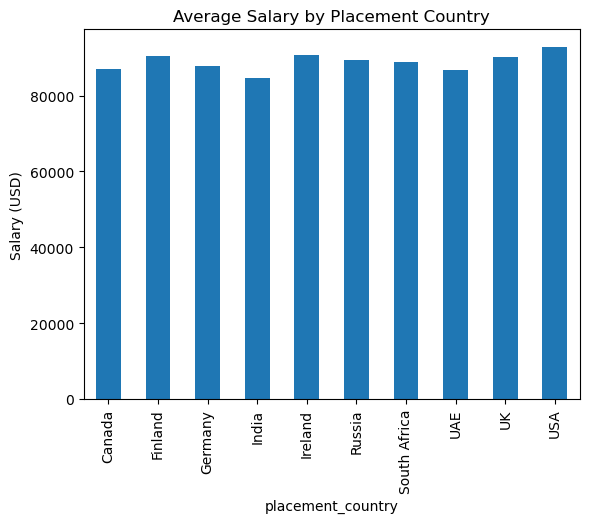

In [27]:
#Average Salary by Placement Country
df[df["placement_status"] == "Placed"].groupby("placement_country")["starting_salary_usd"].mean().plot(kind="bar")
plt.title("Average Salary by Placement Country")
plt.ylabel("Salary (USD)")
plt.show()

In [29]:
#Number of Students by Year of Enrollment
enrollment_by_year = df["year_of_enrollment"].value_counts().sort_index()
print(enrollment_by_year)

year_of_enrollment
2019    1004
2020     992
2021     963
2022    1027
2023    1014
Name: count, dtype: int64


In [31]:
#Top Companies by Average Starting Salary
top_salary_by_company = df[df["placement_status"] == "Placed"].groupby("placement_company")["starting_salary_usd"].mean().sort_values(ascending=False).head(10)
print(top_salary_by_company)

placement_company
Intel        93425.259259
Apple        93112.184615
Siemens      92735.790055
Amazon       91870.122642
IBM          89481.344262
SAP          88851.358696
Microsoft    87723.627273
Facebook     87301.368984
Deloitte     87296.857895
McKinsey     87274.224599
Name: starting_salary_usd, dtype: float64


destination_city
Dubai           307
Moscow          305
Dublin          268
London          251
Delhi           176
Abu Dhabi       164
Berlin          147
Johannesburg    147
Turku           142
Munich          138
Name: count, dtype: int64


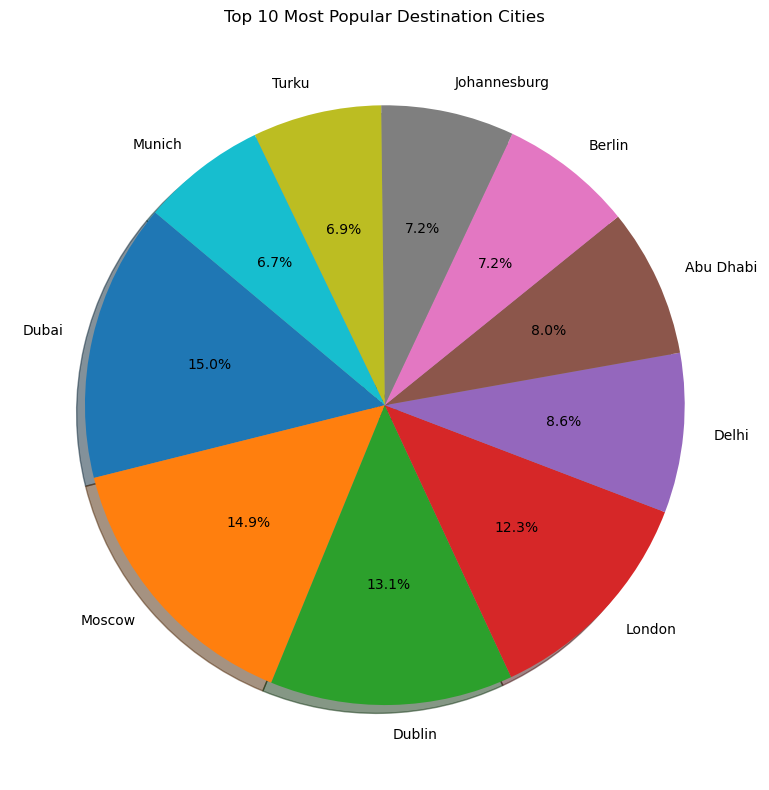

In [33]:
#Top 10 Most Popular Destination Cities
top_cities = df["destination_city"].value_counts().head(10)
print(top_cities)

plt.figure(figsize=(8, 8))
top_cities.plot(kind="pie", autopct="%1.1f%%", startangle=140, shadow=True)
plt.title("Top 10 Most Popular Destination Cities")
plt.ylabel("")  
plt.tight_layout()
plt.show()


In [35]:
#Distribution of Scholarships by Destination Country
scholarship_by_dest = df.groupby("destination_country")["scholarship_received"].value_counts()
print(scholarship_by_dest)

destination_country  scholarship_received
Canada               Yes                     242
                     No                      241
Finland              Yes                     261
                     No                      213
Germany              No                      259
                     Yes                     259
India                No                      249
                     Yes                     244
Ireland              Yes                     237
                     No                      235
Russia               Yes                     278
                     No                      237
South Africa         Yes                     260
                     No                      236
UAE                  Yes                     285
                     No                      253
UK                   Yes                     270
                     No                      256
USA                  No                      244
                     Yes   

In [37]:
#Average Test Scores by Test Type
avg_test_score = df.groupby("language_proficiency_test")["test_score"].mean().sort_values(ascending=False)
print(avg_test_score)

language_proficiency_test
PTE         7.068869
Duolingo    7.041068
TOEFL       6.997358
IELTS       6.926866
None        0.000000
Name: test_score, dtype: float64


In [39]:
#Student Count by Visa Type
visa_distribution = df["visa_status"].value_counts()
print(visa_distribution)

visa_status
Schengen Student Visa    863
Tier 4                   853
J1                       848
Student Visa             817
Study Permit             811
F1                       808
Name: count, dtype: int64


origin_country
India           93536.097959
Finland         90868.122363
South Africa    90228.273810
Germany         89489.572993
Canada          88879.947566
Russia          88795.625954
UK              88134.917695
UAE             87018.602679
Ireland         86377.764925
USA             84385.253165
Name: starting_salary_usd, dtype: float64


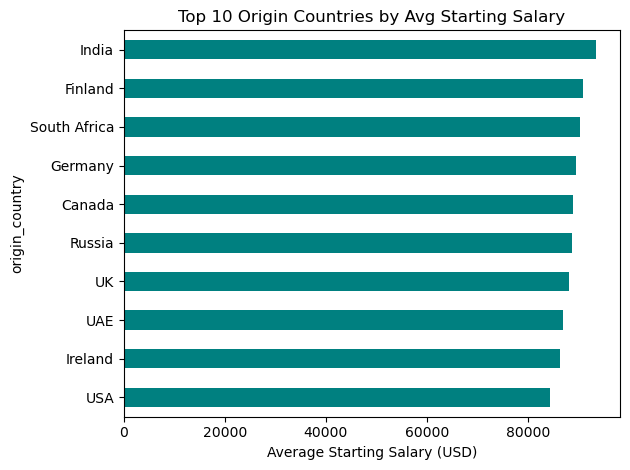

In [41]:
#Top 10 Countries by Average Starting Salary (Origin)
top_salary_by_origin = df[df["placement_status"] == "Placed"].groupby("origin_country")["starting_salary_usd"].mean().sort_values(ascending=False).head(10)
print(top_salary_by_origin)

top_salary_by_origin.plot(kind='barh', color='teal')
plt.xlabel("Average Starting Salary (USD)")
plt.title("Top 10 Origin Countries by Avg Starting Salary")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [43]:
#GPA vs Placement Status
gpa_by_placement = df.groupby("placement_status")["gpa_or_score"].mean()
print(gpa_by_placement)

placement_status
Not Placed    3.256544
Placed        3.237166
Name: gpa_or_score, dtype: float64


In [45]:
#Post-Graduation Visa Distribution
#This counts the number of students by the type/status of visa they received after graduation.
post_visa_distribution = df["post_graduation_visa"].value_counts()
print(post_visa_distribution)

post_graduation_visa
Blue Card          1029
Work Permit        1027
OPT                1012
Post-Study Visa     982
PSW                 950
Name: count, dtype: int64


In [47]:
#Top Hiring Companies
#This lists the top 10 companies that hired the most students.
top_companies = df["placement_company"].value_counts().head(10)
print(top_companies)

placement_company
N/A          2491
Microsoft     220
Amazon        212
Google        203
Apple         195
Tesla         193
Deloitte      190
Intel         189
Facebook      187
McKinsey      187
Name: count, dtype: int64


In [49]:
test_by_placement = df.groupby("placement_status")["language_proficiency_test"].value_counts()
print(test_by_placement)

placement_status  language_proficiency_test
Not Placed        Duolingo                     536
                  PTE                          504
                  None                         488
                  TOEFL                        484
                  IELTS                        479
Placed            IELTS                        526
                  TOEFL                        500
                  PTE                          495
                  Duolingo                     494
                  None                         494
Name: count, dtype: int64


university_name
University of Helsinki             108654.666667
University College Cork            106646.290323
Columbia University                101211.818182
UC Berkeley                        101132.321429
Rhodes University                   98721.314286
Queen's University                  98145.812500
TU Berlin                           97048.540541
Technological University Dublin     95842.233333
NIT Trichy                          95334.833333
University of Birmingham            95219.176471
Name: starting_salary_usd, dtype: float64


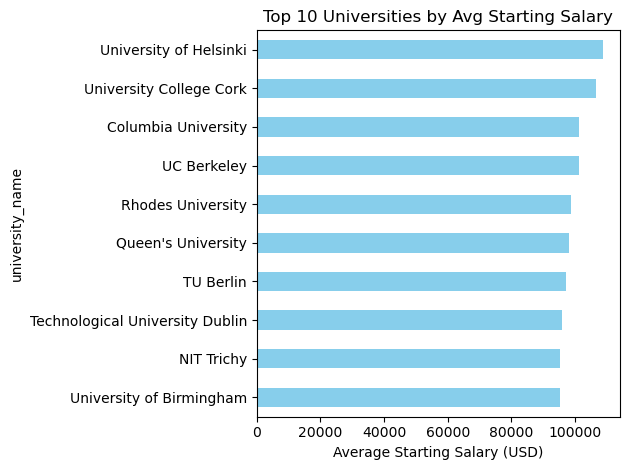

In [51]:
top_salary_by_univ = df[df["placement_status"] == "Placed"].groupby("university_name")["starting_salary_usd"].mean().sort_values(ascending=False).head(10)
print(top_salary_by_univ)

top_salary_by_univ.plot(kind='barh', color='skyblue')
plt.xlabel("Average Starting Salary (USD)")
plt.title("Top 10 Universities by Avg Starting Salary")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

field_of_study
Social Sciences     645
Business            636
Engineering         634
Law                 633
Computer Science    630
Natural Sciences    629
Arts                600
Medicine            593
Name: count, dtype: int64


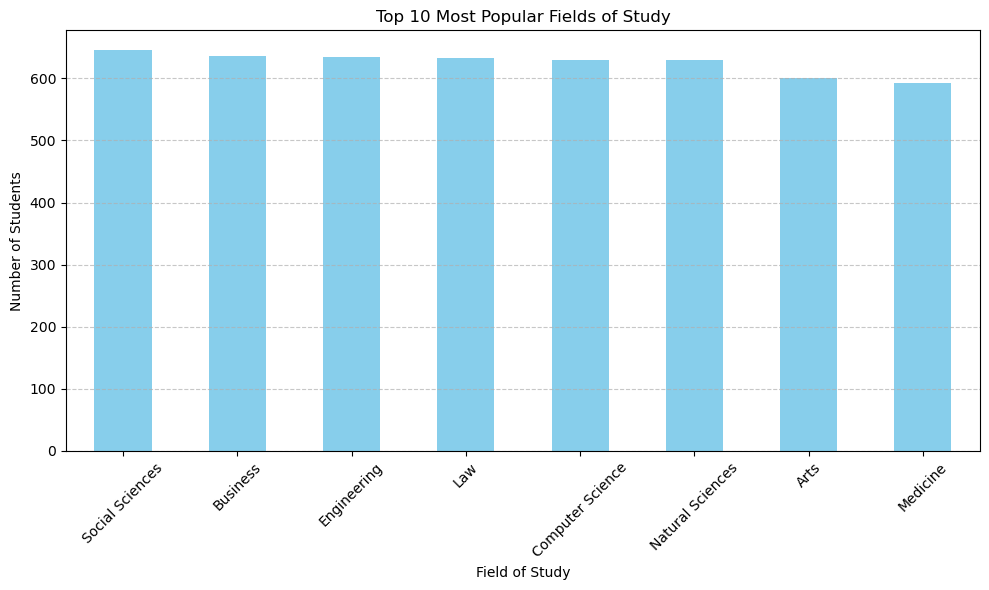

In [53]:
# Most Popular Fields of Study
# It provides insight into educational trends and student interests.
top_fields = df["field_of_study"].value_counts()
print(top_fields)

plt.figure(figsize=(10, 6))
top_fields.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Popular Fields of Study")
plt.xlabel("Field of Study")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()